In [1]:
## Import necessary packages

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Import the Training Set and the Testing Set

training = pd.read_csv('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Capstone 3 Project/train.csv')
testing = pd.read_csv(('C:/Users/chadc/Downloads/DATA SCIENCE MAIN COURSE/Capstone 3 Project/test.csv'))

In [3]:
# Inspect the first 5 rows of the dataset

training.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Rename the column in a form more understandable to me

training = training.rename(columns={'battery_power':'Battery_Power', 'blue':'Bluetooth', 'clock_speed':'Clock_Speed', 'dual_sim':'Dual_Sim','fc':'Front_Camera', 'four_g':'4G', 'int_memory':'Internal_Memory', 'm_dep':'Mobile_Depth', 'mobile_wt':'Weight', 'n_cores':'#_Cores', 'pc':'MP_Primary_Cam', 'px_height':'Pix_Height', 'px_width':'Pix_Width', 'ram':'RAM', 'sc_h':'Screen_Height', 'sc_w':'Screen_Width', 'talk_time':'Talk_Time', 'three_g':'3G', 'touch_screen':'Touch_Screen', 'wifi':'Wi-Fi', 'price_range':'Price_Range'})

In [5]:
# Drop the dependent variable from the dataframe and isolcate all the independent variables

X = training.drop('Price_Range',axis=1) #dropped the target variable

In [6]:
# Check the shape and make sure that the dateframe is missing one column

X.shape

(2000, 20)

In [7]:
# Isolate the independent variable

y=training['Price_Range']

In [8]:
# Check the first five rows of the independent variable

y.head()

0    1
1    2
2    2
3    2
4    1
Name: Price_Range, dtype: int64

In [9]:
# Check the first five rows of the independent variables

testing.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [10]:
# Rename columns in a more understandable form for the test set

testing = testing.rename(columns={'id':'ID', 'battery_power':'Battery_Power', 'blue':'Bluetooth', 'clock_speed':'Clock_Speed', 'dual_sim':'Dual_Sim','fc':'Front_Camera', 'four_g':'4G', 'int_memory':'Internal_Memory', 'm_dep':'Mobile_Depth', 'mobile_wt':'Weight', 'n_cores':'#_Cores', 'pc':'MP_Primary_Cam', 'px_height':'Pix_Height', 'px_width':'Pix_Width', 'ram':'RAM', 'sc_h':'Screen_Height', 'sc_w':'Screen_Width', 'talk_time':'Talk_Time', 'three_g':'3G', 'touch_screen':'Touch_Screen', 'wifi':'Wi-Fi', 'price_range':'Price_Range'})

In [11]:
# Check the shape of the testing dataframe

testing.shape

(1000, 21)

In [12]:
# Print the testing columns

testing.columns

Index(['ID', 'Battery_Power', 'Bluetooth', 'Clock_Speed', 'Dual_Sim',
       'Front_Camera', '4G', 'Internal_Memory', 'Mobile_Depth', 'Weight',
       '#_Cores', 'MP_Primary_Cam', 'Pix_Height', 'Pix_Width', 'RAM',
       'Screen_Height', 'Screen_Width', 'Talk_Time', '3G', 'Touch_Screen',
       'Wi-Fi'],
      dtype='object')

In [13]:
# Check for the null values in the testing set

testing.isnull().sum()

ID                 0
Battery_Power      0
Bluetooth          0
Clock_Speed        0
Dual_Sim           0
Front_Camera       0
4G                 0
Internal_Memory    0
Mobile_Depth       0
Weight             0
#_Cores            0
MP_Primary_Cam     0
Pix_Height         0
Pix_Width          0
RAM                0
Screen_Height      0
Screen_Width       0
Talk_Time          0
3G                 0
Touch_Screen       0
Wi-Fi              0
dtype: int64

In [14]:
# Drop the 'ID' column as it serves no purpose

testing = testing.drop('ID', axis = 1)

In [15]:
# Print the columns of the test set

testing.columns

Index(['Battery_Power', 'Bluetooth', 'Clock_Speed', 'Dual_Sim', 'Front_Camera',
       '4G', 'Internal_Memory', 'Mobile_Depth', 'Weight', '#_Cores',
       'MP_Primary_Cam', 'Pix_Height', 'Pix_Width', 'RAM', 'Screen_Height',
       'Screen_Width', 'Talk_Time', '3G', 'Touch_Screen', 'Wi-Fi'],
      dtype='object')

## Scaler

In [16]:
# Instantiate the Standard Scaler

scale = StandardScaler()

In [17]:
# Fit the Scaler to the dataset

train_scale = scale.fit_transform(X)

In [18]:
# Print the scaled set in array form

train_scale

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [19]:
# Fit the scaler to the test set

test_scale = scale.fit_transform(testing)

In [20]:
# Print the scaled test set

test_scale

array([[-0.47545131,  0.968496  ,  0.31260069, ..., -1.76021608,
         1.        , -1.01409939],
       [-0.94278218,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 1.29207729,  0.968496  ,  1.51908734, ..., -1.76021608,
         1.        ,  0.98609664],
       ...,
       [-0.1469316 , -1.03252879, -0.16999397, ...,  0.56811207,
        -1.        , -1.01409939],
       [ 0.65817305,  0.968496  , -1.25583195, ..., -1.76021608,
         1.        , -1.01409939],
       [ 0.04971753,  0.968496  , -1.25583195, ...,  0.56811207,
        -1.        ,  0.98609664]])

## Initialize Train Test Set

In [21]:
# Initialize the Train Test Set

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

## Logistic Regression

In [22]:
# Instantiate Logistic Regression

lr = LogisticRegression()

In [23]:
X_train_scale = scale.fit_transform(X_train)

In [24]:
X_test_scale = scale.fit_transform(X_test)

In [25]:
lr.fit(X_train_scale, y_train)

LogisticRegression()

In [26]:
y_prediction=lr.predict(X_test_scale)

In [27]:
y_prediction

array([2, 3, 1, 2, 3, 1, 3, 1, 1, 2, 3, 0, 1, 1, 1, 0, 2, 1, 0, 0, 3, 3,
       0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 2, 2, 1, 2, 0, 3, 2, 2, 0, 2, 1, 2,
       3, 2, 3, 0, 2, 0, 1, 1, 0, 0, 2, 3, 0, 3, 0, 3, 2, 2, 0, 3, 1, 0,
       2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 3, 3, 3, 3, 1, 0, 1, 0, 3, 2, 3, 0,
       3, 0, 1, 0, 3, 0, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 3, 0, 1, 3, 0, 3,
       1, 0, 3, 2, 1, 3, 2, 2, 0, 1, 3, 0, 2, 3, 3, 2, 0, 0, 3, 0, 0, 3,
       2, 3, 2, 1, 0, 1, 3, 0, 2, 0, 1, 3, 1, 3, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 3, 3, 3, 3, 3, 0, 3, 0, 1, 1, 2, 1, 0, 0, 2, 3,
       2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 0, 1, 0, 0, 0,
       2, 3, 3, 0, 1, 3, 1, 0, 3, 2, 2, 3, 3, 2, 2, 3, 2, 0, 0, 0, 2, 0,
       0, 1, 3, 2, 2, 3, 1, 2, 3, 0, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 2, 2,
       0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 2, 1, 0, 0, 2, 2, 2, 0, 3, 1, 1, 2,
       3, 3, 0, 2, 0, 0, 0, 3, 3, 2, 0, 0, 2, 2, 3, 2, 0, 3, 2, 0, 0, 0,
       0, 3, 3, 0, 3, 2, 2, 3, 2, 2, 3, 0, 2, 3, 3,

In [28]:
lr_accuracy = accuracy_score(y_test, y_prediction)

In [29]:
print(confusion_matrix(y_test, y_prediction))

[[96  0  0  0]
 [ 5 89  0  0]
 [ 0  9 96  4]
 [ 0  0  4 97]]


In [30]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        96
           1       0.91      0.95      0.93        94
           2       0.96      0.88      0.92       109
           3       0.96      0.96      0.96       101

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.95       400
weighted avg       0.95      0.94      0.94       400



## K Neighbors Classifier

In [31]:
knn=KNeighborsClassifier(n_neighbors=5)

In [32]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
y_prediction1 = knn.predict(X_test)

In [34]:
y_prediction1

array([2, 3, 1, 2, 3, 1, 2, 1, 2, 2, 3, 0, 2, 1, 1, 0, 2, 1, 0, 0, 3, 3,
       0, 3, 1, 3, 0, 2, 3, 0, 1, 3, 2, 2, 1, 2, 0, 2, 3, 3, 0, 2, 1, 2,
       3, 2, 3, 0, 2, 1, 1, 1, 0, 0, 3, 3, 0, 3, 0, 3, 2, 2, 0, 3, 1, 0,
       2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 3, 3, 3, 3, 1, 0, 1, 0, 3, 2, 3, 0,
       3, 0, 2, 0, 3, 0, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 3, 0, 1, 3, 0, 3,
       1, 0, 3, 1, 0, 3, 2, 2, 0, 1, 3, 0, 2, 3, 2, 1, 0, 0, 2, 0, 0, 3,
       2, 3, 2, 1, 0, 1, 3, 1, 2, 0, 1, 3, 1, 3, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 3, 3, 3, 3, 3, 0, 3, 0, 1, 1, 2, 1, 0, 0, 2, 3,
       2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 0, 1, 1, 1, 0, 0, 0,
       2, 3, 3, 0, 1, 3, 1, 0, 3, 2, 2, 3, 3, 2, 2, 3, 2, 0, 0, 0, 2, 0,
       0, 2, 3, 2, 2, 2, 1, 2, 3, 0, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 2, 2,
       0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 2, 1, 0, 0, 2, 2, 2, 0, 3, 1, 2, 2,
       3, 3, 0, 2, 1, 0, 0, 3, 3, 2, 0, 0, 2, 2, 3, 2, 0, 3, 1, 0, 0, 0,
       0, 3, 3, 0, 2, 2, 2, 3, 2, 2, 3, 0, 2, 3, 3,

In [35]:
knn_accuracy=accuracy_score(y_test, y_prediction1)

In [36]:
knn_accuracy

0.9425

In [37]:
print(confusion_matrix(y_test, y_prediction1))

[[ 94   2   0   0]
 [  3  89   2   0]
 [  0   7 100   2]
 [  0   0   7  94]]


In [38]:
print(classification_report(y_test, y_prediction1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        96
           1       0.91      0.95      0.93        94
           2       0.92      0.92      0.92       109
           3       0.98      0.93      0.95       101

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



## Decision Tree Classifier

In [39]:
dtc=DecisionTreeClassifier()

In [40]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_prediction2=dtc.predict(X_test)

In [42]:
y_prediction2

array([2, 3, 1, 2, 3, 1, 3, 1, 1, 2, 3, 0, 2, 1, 1, 0, 2, 1, 0, 0, 3, 3,
       0, 3, 1, 2, 0, 2, 3, 0, 0, 3, 2, 1, 1, 2, 0, 2, 3, 3, 0, 2, 1, 2,
       2, 2, 3, 1, 3, 0, 2, 1, 0, 0, 3, 3, 0, 3, 0, 3, 2, 2, 0, 2, 1, 0,
       2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 3, 3, 3, 3, 1, 0, 1, 1, 3, 2, 3, 1,
       3, 0, 1, 0, 3, 0, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 3, 0, 1, 3, 0, 3,
       0, 0, 3, 2, 1, 2, 1, 2, 0, 2, 3, 0, 2, 3, 2, 1, 1, 0, 2, 0, 0, 3,
       2, 3, 2, 1, 0, 1, 2, 1, 2, 0, 1, 2, 1, 3, 0, 0, 2, 2, 3, 1, 1, 1,
       0, 2, 2, 0, 1, 2, 3, 3, 3, 3, 3, 0, 3, 0, 0, 1, 2, 1, 0, 0, 2, 3,
       2, 2, 1, 1, 3, 1, 3, 2, 1, 1, 1, 2, 2, 3, 3, 0, 1, 1, 1, 0, 0, 0,
       2, 3, 3, 0, 1, 3, 1, 0, 3, 2, 2, 3, 3, 2, 2, 3, 2, 0, 0, 1, 2, 1,
       0, 1, 3, 2, 3, 2, 0, 1, 3, 0, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 2, 2,
       0, 3, 3, 1, 1, 0, 1, 2, 3, 3, 2, 2, 0, 0, 2, 2, 1, 0, 3, 1, 1, 2,
       3, 3, 0, 2, 1, 0, 0, 3, 3, 2, 0, 0, 2, 2, 3, 2, 0, 2, 1, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 2, 3, 2, 2, 3, 0, 2, 3, 3,

In [43]:
dtc_accuracy = accuracy_score(y_test, y_prediction2)

In [44]:
dtc_accuracy

0.83

In [45]:
print(confusion_matrix(y_test, y_prediction2))

[[87  9  0  0]
 [ 9 74 11  0]
 [ 0 16 83 10]
 [ 0  0 13 88]]


In [46]:
print(classification_report(y_test, y_prediction2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        96
           1       0.75      0.79      0.77        94
           2       0.78      0.76      0.77       109
           3       0.90      0.87      0.88       101

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



## Support Vector Classifier

In [47]:
svc = SVC()

In [48]:
svc.fit(X_train, y_train)

SVC()

In [49]:
y_prediction3 = svc.predict(X_test)

In [50]:
y_prediction3

array([2, 3, 1, 2, 3, 1, 3, 1, 1, 2, 3, 0, 1, 1, 1, 0, 2, 1, 0, 0, 3, 3,
       0, 3, 1, 3, 0, 2, 3, 0, 1, 3, 2, 2, 1, 2, 0, 3, 3, 3, 0, 2, 1, 2,
       3, 2, 3, 0, 2, 1, 1, 1, 0, 1, 3, 3, 0, 3, 0, 3, 2, 2, 0, 3, 1, 0,
       2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 3, 3, 3, 3, 1, 0, 1, 0, 3, 2, 3, 0,
       3, 0, 2, 0, 3, 0, 2, 1, 2, 3, 1, 3, 2, 2, 1, 1, 3, 0, 1, 3, 0, 3,
       1, 0, 3, 2, 1, 3, 1, 2, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 0, 0, 3,
       2, 3, 2, 1, 0, 1, 3, 1, 2, 0, 1, 3, 1, 3, 0, 0, 2, 2, 2, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 3, 3, 3, 3, 3, 0, 3, 0, 1, 1, 2, 1, 0, 0, 2, 3,
       2, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 2, 3, 3, 0, 1, 1, 1, 0, 0, 0,
       2, 3, 3, 0, 1, 3, 1, 0, 3, 2, 2, 3, 3, 2, 2, 3, 2, 0, 1, 0, 2, 0,
       0, 2, 3, 2, 2, 2, 1, 2, 3, 0, 2, 2, 3, 3, 1, 2, 3, 3, 1, 3, 2, 2,
       0, 3, 3, 1, 1, 0, 1, 1, 3, 3, 2, 1, 1, 0, 2, 2, 2, 0, 3, 1, 2, 2,
       3, 3, 0, 2, 0, 0, 0, 3, 3, 2, 0, 0, 2, 2, 3, 2, 0, 3, 2, 0, 0, 0,
       0, 3, 3, 0, 2, 2, 2, 3, 2, 2, 3, 0, 2, 3, 3,

In [51]:
svc_accuracy=accuracy_score(y_test, y_prediction3,)

In [52]:
svc_accuracy

0.9575

In [53]:
print(confusion_matrix(y_test, y_prediction3))

[[ 93   3   0   0]
 [  1  92   1   0]
 [  0   7 100   2]
 [  0   0   3  98]]


In [ ]:
print(classification_report(y_test, y_prediction3))

## Gradient Boosting Classifier

In [55]:
gbc = GradientBoostingClassifier()

In [56]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [57]:
y_prediction4 = gbc.predict(X_test)

In [58]:
gbc_accuracy=accuracy_score(y_test, y_prediction4)

In [59]:
gbc_accuracy

0.9125

In [60]:
print(confusion_matrix(y_test, y_prediction4))

[[92  4  0  0]
 [ 1 86  7  0]
 [ 0 10 94  5]
 [ 0  0  8 93]]


In [61]:
print(classification_report(y_test, y_prediction4))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        96
           1       0.86      0.91      0.89        94
           2       0.86      0.86      0.86       109
           3       0.95      0.92      0.93       101

    accuracy                           0.91       400
   macro avg       0.92      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



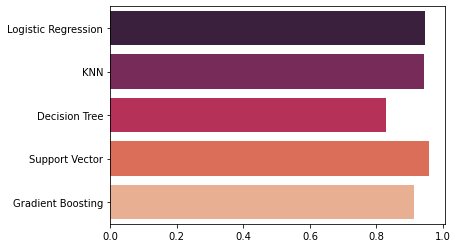

In [62]:
sns.barplot(x = [lr_accuracy,knn_accuracy,dtc_accuracy, svc_accuracy, gbc_accuracy], y = ['Logistic Regression','KNN','Decision Tree', 'Support Vector', 'Gradient Boosting'],palette = 'rocket')

In [63]:
model_accuracy = {'Model':['Logistic Regression', 'K Nearest Neighbors', 'Decision Tree', 'Support Vector', 'Gradient_Boosting'], 'Accuracy':[lr_accuracy, knn_accuracy, dtc_accuracy, svc_accuracy, gbc_accuracy]}


In [64]:
df = pd.DataFrame(data=model_accuracy)
df

,Model,Accuracy
0,Logistic Regression,0.9450
1,K Nearest Neighbors,0.9425
2,Decision Tree,0.8300
3,Support Vector,0.9575
4,Gradient_Boosting,0.9125
